In [1]:
# Jupyter Data Science Workflow

from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
#%%
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

#urlretrieve(URL, "Fremont.csv")

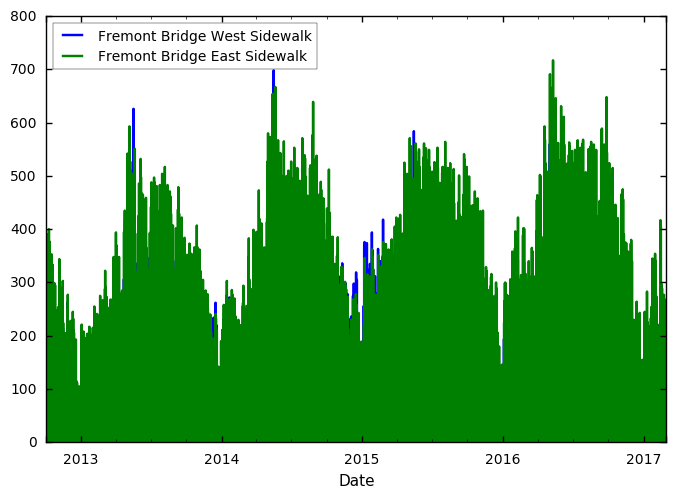

In [2]:
#%%
data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)

#%%
data.plot();

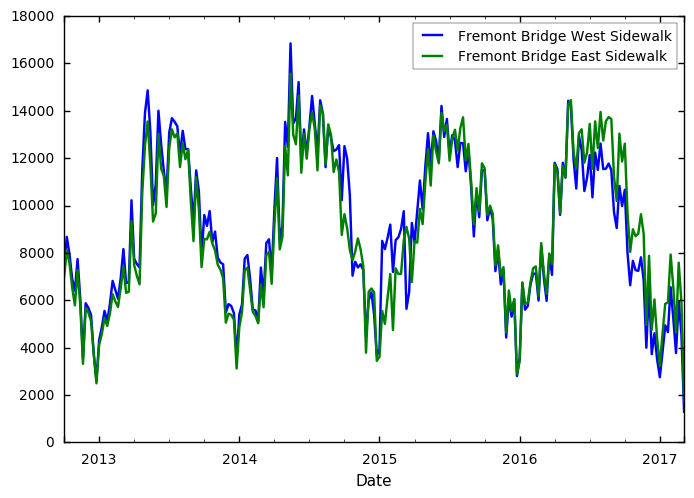

In [3]:
data.resample('W').sum().plot();

In [4]:
data.columns

Index(['Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk'], dtype='object')

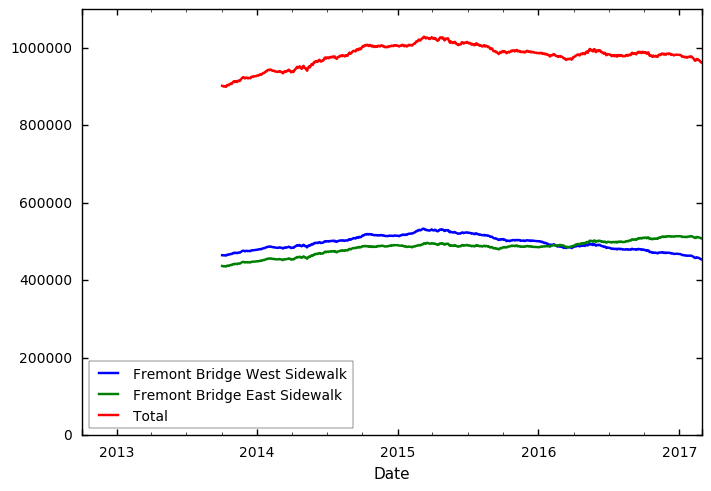

In [5]:
data['Total'] = data.sum(axis = 1)
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

In [6]:
data.index.date

array([datetime.date(2012, 10, 3), datetime.date(2012, 10, 3),
       datetime.date(2012, 10, 3), ..., datetime.date(2017, 2, 28),
       datetime.date(2017, 2, 28), datetime.date(2017, 2, 28)], dtype=object)

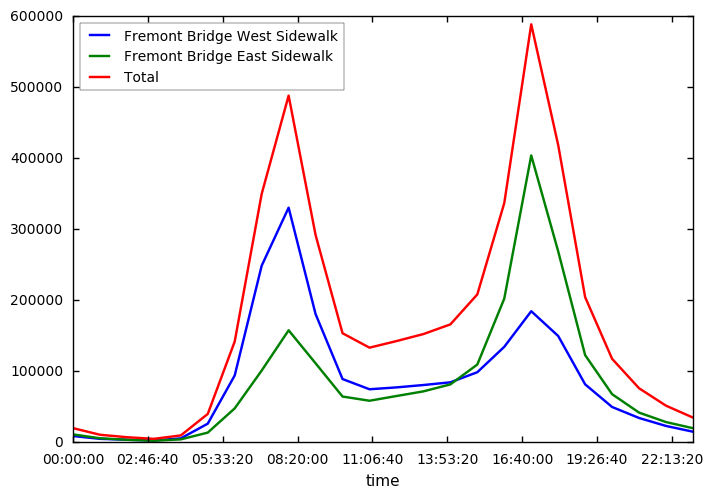

In [7]:
data.groupby(data.index.time).sum().plot();

In [8]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)

In [9]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


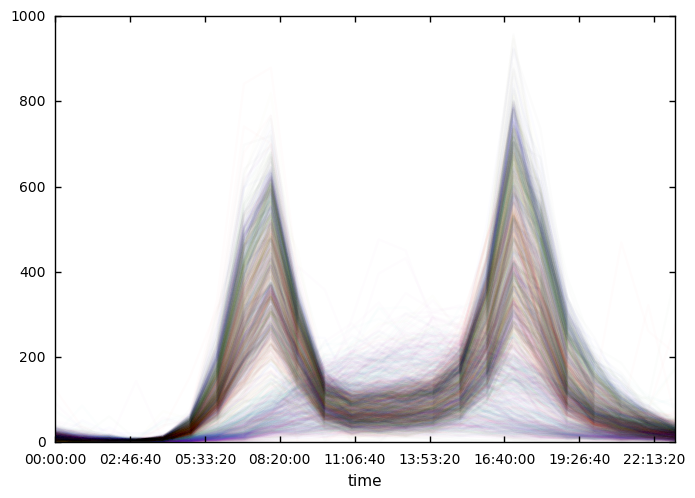

In [10]:
pivoted.plot(legend=False, alpha = 0.01);